In [5]:
#Importing keras libraries and packages

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [6]:
#step1 Initializing CNN
classifier = Sequential()

# step2 adding 1st Convolution layer and Pooling layer
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and polling layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))


#step4 Flattening the layers
classifier.add(Flatten())

#step5 Full_Connection

classifier.add(Dense(units=32,activation = 'relu'))

classifier.add(Dense(units=64,activation = 'relu'))

classifier.add(Dense(units=128,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=6,activation = 'softmax'))

In [7]:
#step6 Compiling CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [24]:
#step7 Fitting CNN to images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # To rescaling the image in range of [0,1]
                                   shear_range = 0.2, # To randomly shear the images 
                                   zoom_range = 0.2, # To randomly zoom the images
                                   horizontal_flip = True) #  for randomly flipping half of the images horizontally 

test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/train',
                                                target_size=(64,64),
                                                batch_size=12, #Total no. of batches
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/ASUS/Documents/TUGAS AKHIR AI/FIX4/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical')

history=classifier.fit_generator(training_set,
                         steps_per_epoch=350, # Total training images
                         epochs = 20, # Total no. of epochs
                         validation_data = test_set,
                         validation_steps = 150) # Total testing images


Training the data...

Found 4200 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Epoch 1/20
  2/350 [..............................] - ETA: 17s - loss: 0.3086 - accuracy: 0.9167

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


350/350 [==============================] - 23s 66ms/step - loss: 0.0945 - accuracy: 0.9710 - val_loss: 0.1161 - val_accuracy: 0.9778
Epoch 2/20
350/350 [==============================] - 24s 68ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.1685 - val_accuracy: 0.9567
Epoch 3/20
350/350 [==============================] - 21s 60ms/step - loss: 0.0518 - accuracy: 0.9826 - val_loss: 0.2095 - val_accuracy: 0.9489
Epoch 4/20
350/350 [==============================] - 20s 56ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0756 - val_accuracy: 0.9789
Epoch 5/20
350/350 [==============================] - 20s 57ms/step - loss: 0.0564 - accuracy: 0.9812 - val_loss: 0.1281 - val_accuracy: 0.9678
Epoch 6/20
350/350 [==============================] - 19s 55ms/step - loss: 0.1186 - accuracy: 0.9643 - val_loss: 0.0835 - val_accuracy: 0.9800
Epoch 7/20
350/350 [==============================] - 20s 56ms/step - loss: 0.0688 - accuracy: 0.9779 - val_loss: 0.1201 - val_accuracy: 0.9750
Epo

In [25]:
#step8 saving model 

classifier.save("model1.h5")

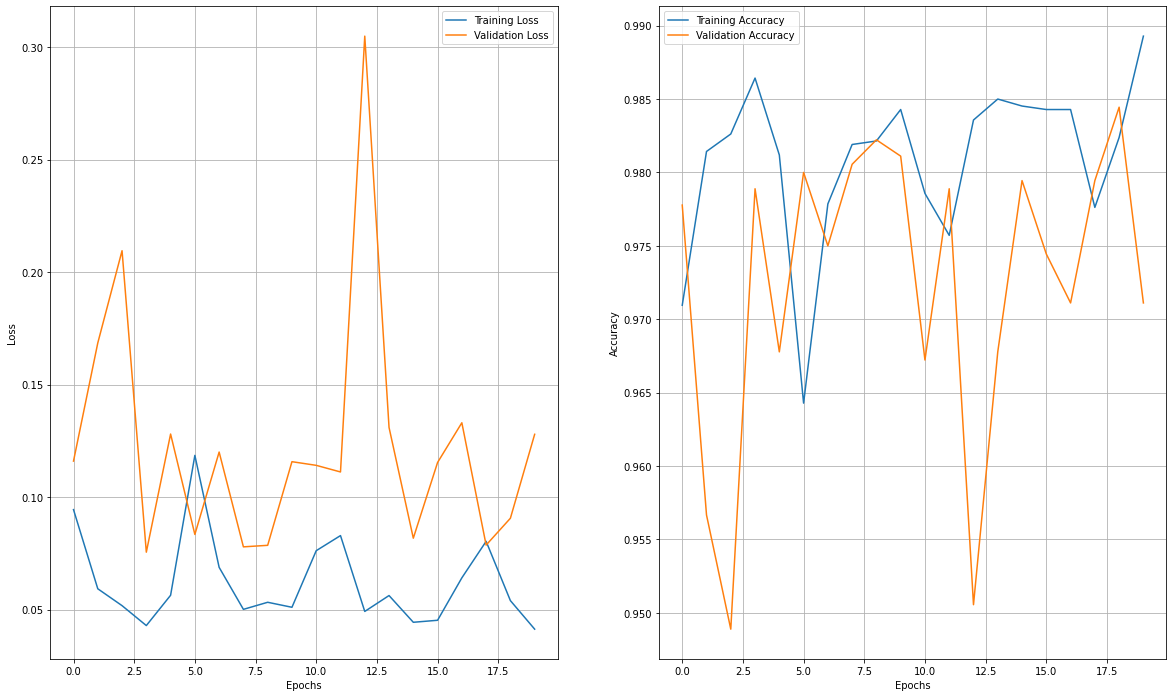

In [26]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()